In [1]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
import os
import numpy as np
import torch
sys.path.append('..')
from config import *
from load_data import load_data, Dataset, split_train_val_test
from torch.utils.data import DataLoader

In [2]:
# load data
xvertseg_imgs, xvertseg_msks, xvertseg_scores = load_data(xvertseg_dir)
# verse2019_imgs, verse2019_msks, verse2019_scores = load_data(verse2019_dir)

# # stack data sets together
# imgs = np.concatenate((xvertseg_imgs, verse2019_imgs))
# msks = np.concatenate((xvertseg_msks, verse2019_msks))
# scores = xvertseg_scores.append(verse2019_scores)

Loading images from /mnt/netcache/bodyct/experiments/vertebra_fracture_detection_t9560/datasets/xvertseg/images...
Loading masks from /mnt/netcache/bodyct/experiments/vertebra_fracture_detection_t9560/datasets/xvertseg/masks...


In [3]:
# split in train/val/test
train_set, val_set, test_set = split_train_val_test(xvertseg_imgs, xvertseg_msks, xvertseg_scores, patch_size, data_aug)

Available cases: 15 
train: 12, val: 1, test: 2
Extracting patches...


In [4]:
train_loader = DataLoader(train_set, batch_size=1,  num_workers=16, drop_last=True)

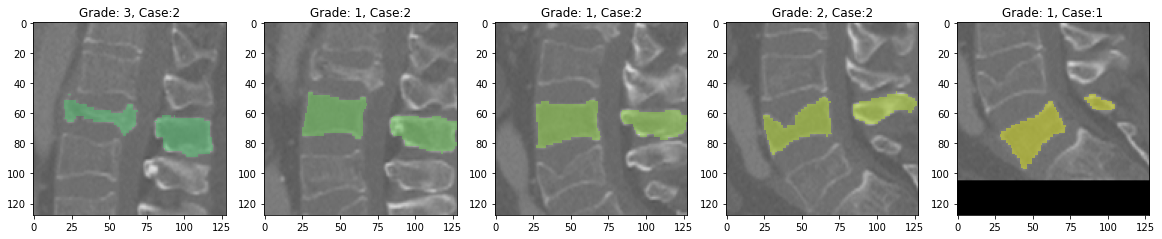

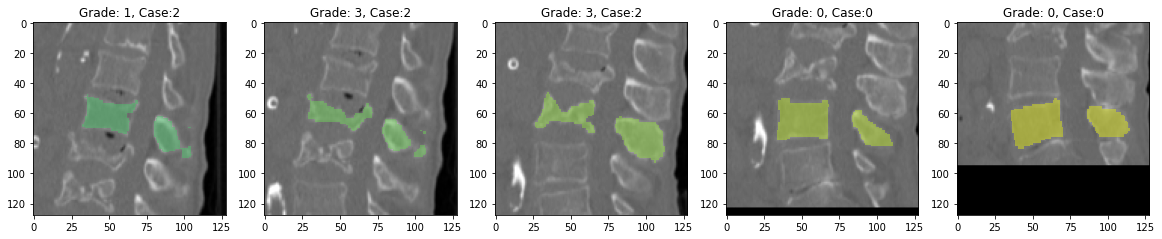

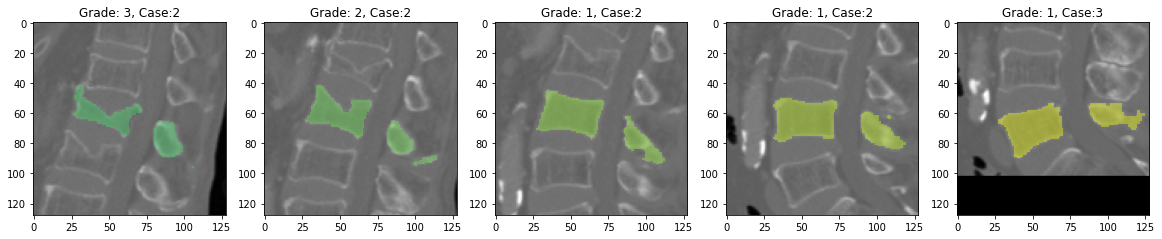

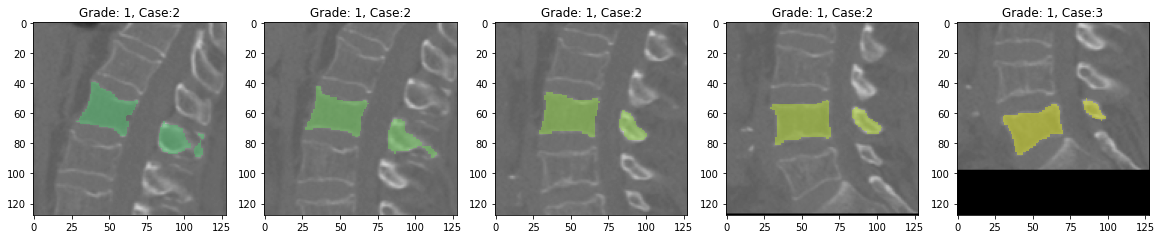

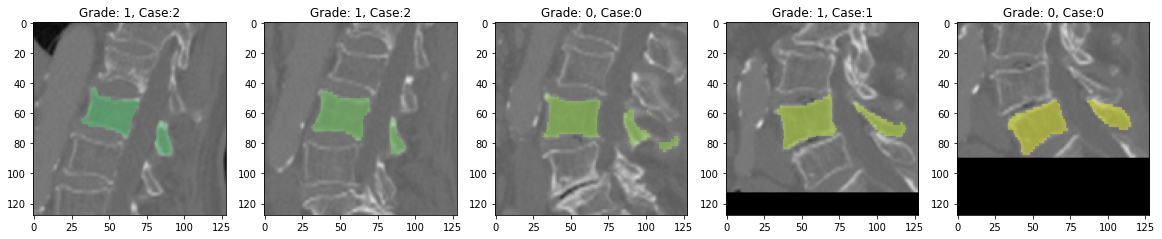

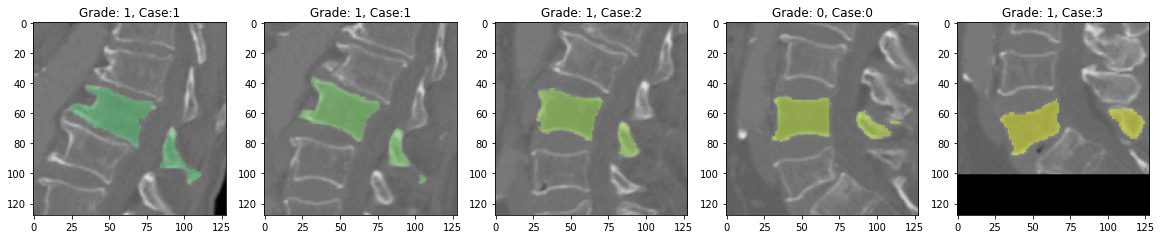

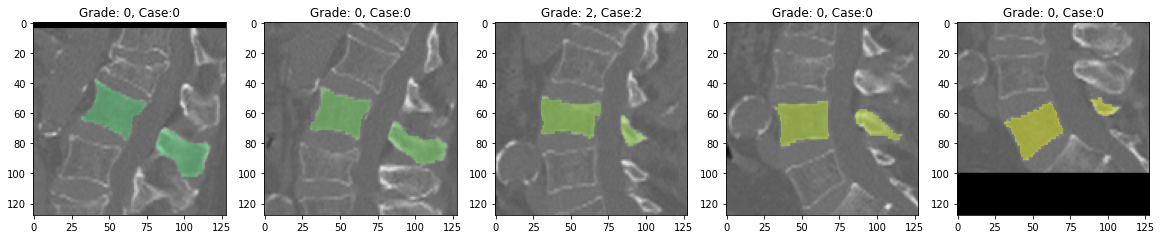

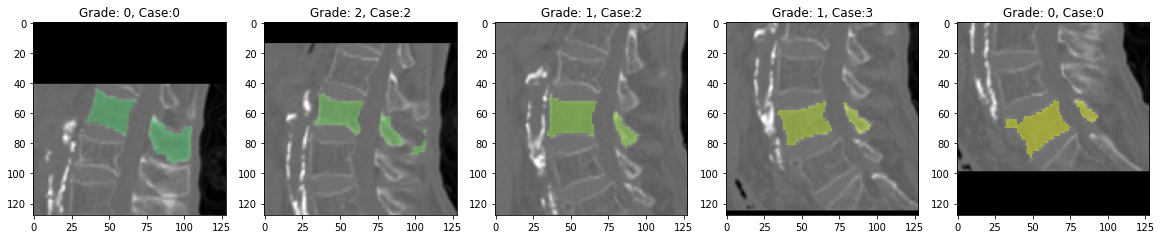

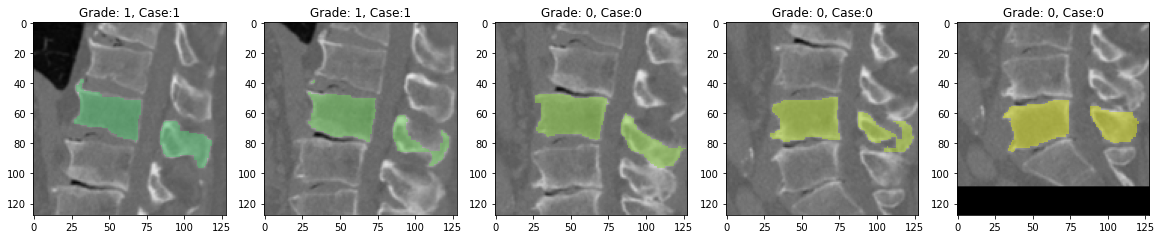

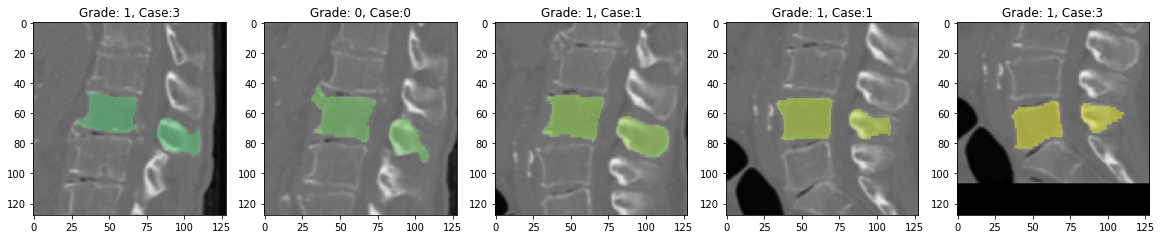

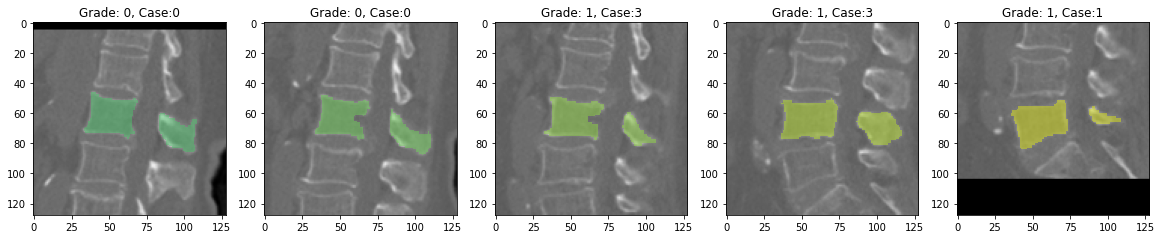

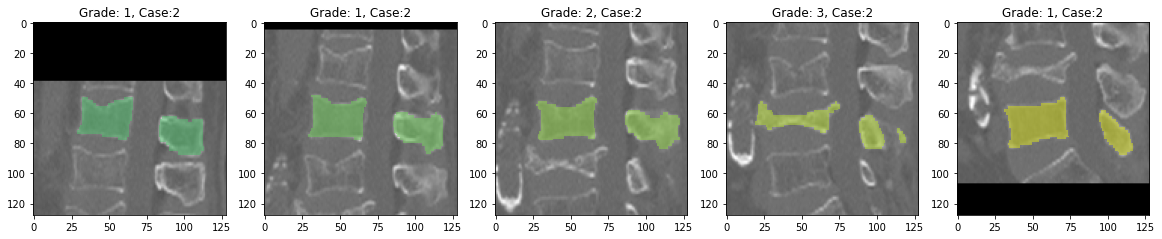

In [23]:
for x, y in train_loader:
    plt.figure(figsize=(20, 10))
    
    x = torch.squeeze(x)
    y = torch.squeeze(y)
    seq_len = len(x)
    
    for i, patch in enumerate(x):
        img = patch[0]
        msk = patch[1]
        score = y[i]
        
        mid_slice = img.shape[0] // 2 
        msk = np.ma.masked_where(msk == 0, msk)
        
        plt.subplot(1, seq_len, i + 1)
        plt.imshow(img[mid_slice, :, :], cmap='gray', vmin=0, vmax=1)
        plt.imshow(msk[mid_slice, :, :], alpha=0.5, vmin=0, vmax=1)
        plt.title('Grade: {}, Case:{}'.format(score[0].int(), score[1].int()))